# Lending Club Data Exploration

## Data Overview
The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

## Business Objective
Lending Club wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

## Preliminary Wrangling
This document explores a dataset containing loan data and attributes for approximately 40,000 loan application.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format

In [2]:
# load in the dataset into a pandas dataframe, print statistics
loan_df = pd.read_csv('loan.csv',encoding = "ISO-8859-1", low_memory=False)
print(loan_df.shape)
print(loan_df.dtypes)
print(loan_df.head(10))

(39717, 111)
id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object
        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000          4975.00   36 months   
1  1077430    1314167       2500         2500          2500.00   60 months   
2  1077175    1313524       2400         2400          2400.00   36 months   
3  1076863    1277178      10000        10000         10000.00   36 months   
4  1075358    1311748       3000         3000          3000.00   60 months   
5  1075269    1311441       5000         5000          5000.00   36 months

In [3]:
# percentage of null values in each column
round(100 * loan_df.isnull().sum()/loan_df['id'].count())

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
                              ...  
tax_liens                      0.00
tot_hi_cred_lim              100.00
total_bal_ex_mort            100.00
total_bc_limit               100.00
total_il_high_credit_limit   100.00
Length: 111, dtype: float64

In [4]:
# Removing columns that have more that 50% nulls
threshold_number = loan_df['id'].count()/2
loan_df = loan_df.loc[:, loan_df.isnull().sum(axis=0) <= threshold_number]
loan_df.shape

(39717, 54)

In [5]:
# Checking number of unique values in each column
loan_df.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [6]:
# Removing columns that has single value. Those columns will not give us any insights
loan_df = loan_df.loc[:, loan_df.nunique(axis=0) > 1]
loan_df.shape

(39717, 45)

In [7]:
loan_df.nunique().sort_values(ascending=False)

id                         39717
url                        39717
member_id                  39717
total_pymnt                37850
total_pymnt_inv            37518
total_rec_int              35148
last_pymnt_amnt            34930
emp_title                  28820
desc                       26527
revol_bal                  21711
title                      19615
installment                15383
funded_amnt_inv             8205
total_rec_prncp             7976
annual_inc                  5318
recoveries                  4040
dti                         2868
collection_recovery_fee     2616
total_rec_late_fee          1356
out_prncp_inv               1138
out_prncp                   1137
revol_util                  1089
funded_amnt                 1041
loan_amnt                    885
zip_code                     823
earliest_cr_line             526
int_rate                     371
last_credit_pull_d           106
last_pymnt_d                 101
total_acc                     82
issue_d   

In [8]:
# Checking data in the columns with low variation
loan_df['term'].value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [9]:
# converting term to int datatype , since term_months represents numeric
loan_df['term_months'] = loan_df['term'].str.lstrip().str.slice(stop=2).astype('int')

In [10]:
loan_df['term_months'].value_counts()

36    29096
60    10621
Name: term_months, dtype: int64

In [11]:
# dropping unused term column
loan_df = loan_df.drop('term', axis=1)

In [12]:
# check unique values for pub_rec_bankruptcies
loan_df['pub_rec_bankruptcies'].value_counts()
# looks like few values are missing

0.00    37339
1.00     1674
2.00        7
Name: pub_rec_bankruptcies, dtype: int64

In [13]:
# check null value count
loan_df['pub_rec_bankruptcies'].isnull().sum()

697

In [14]:
# we dont want to be bias to bankruptcies. Removing rows with null values as it's safe to remove, since
# low percentage of null values
loan_df = loan_df[~loan_df['pub_rec_bankruptcies'].isnull()]
# verify null values have been removed
loan_df['pub_rec_bankruptcies'].isnull().sum() == 0

True

In [15]:
# check for unique values in loan_status column
loan_df['loan_status'].value_counts()

Fully Paid     32371
Charged Off     5509
Current         1140
Name: loan_status, dtype: int64

In [16]:
# check null value count
loan_df['loan_status'].isnull().sum()

0

In [17]:
# percentage of null values in each column
round(100 * loan_df.isnull().sum()/loan_df['id'].count(),2)

id                         0.00
member_id                  0.00
loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_title                  6.19
emp_length                 2.75
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
url                        0.00
desc                      33.15
purpose                    0.00
title                      0.03
zip_code                   0.00
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
earliest_cr_line           0.00
inq_last_6mths             0.00
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_util                 0.13
total_acc                  0.00
out_prnc

In [18]:
# removing description as it's not significant
loan_df = loan_df.drop('desc', axis=1)

In [19]:
# removing rows with null values(as they are low in percentage):
# employee title, employee length, title, revol_util, last_pymnt_d
loan_df = loan_df[~loan_df['emp_title'].isnull()]
loan_df = loan_df[~loan_df['emp_length'].isnull()]
loan_df = loan_df[~loan_df['title'].isnull()]
loan_df = loan_df[~loan_df['revol_util'].isnull()]
loan_df = loan_df[~loan_df['last_pymnt_d'].isnull()]

In [20]:
# percentage of null values in each column
round(100 * loan_df.isnull().sum()/loan_df['id'].count(),2)

id                        0.00
member_id                 0.00
loan_amnt                 0.00
funded_amnt               0.00
funded_amnt_inv           0.00
int_rate                  0.00
installment               0.00
grade                     0.00
sub_grade                 0.00
emp_title                 0.00
emp_length                0.00
home_ownership            0.00
annual_inc                0.00
verification_status       0.00
issue_d                   0.00
loan_status               0.00
url                       0.00
purpose                   0.00
title                     0.00
zip_code                  0.00
addr_state                0.00
dti                       0.00
delinq_2yrs               0.00
earliest_cr_line          0.00
inq_last_6mths            0.00
open_acc                  0.00
pub_rec                   0.00
revol_bal                 0.00
revol_util                0.00
total_acc                 0.00
out_prncp                 0.00
out_prncp_inv             0.00
total_py

None of the columns contains missing values.

In [21]:
# exploring data values in each column
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,term_months
1,1077430,1314167,2500,2500,2500.00,15.27%,59.83,C,C4,Ryder,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00,60
3,1076863,1277178,10000,10000,10000.00,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.00,36
4,1075358,1311748,3000,3000,3000.00,12.69%,67.79,B,B5,University Medical Group,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.00,60
5,1075269,1311441,5000,5000,5000.00,7.90%,156.46,A,A4,Veolia Transportaton,...,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.00,36
6,1069639,1304742,7000,7000,7000.00,15.96%,170.08,C,C5,Southern Star Photography,...,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.00,60


In [22]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,term_months
1,1077430,1314167,2500,2500,2500.00,15.27%,59.83,C,C4,Ryder,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00,60
3,1076863,1277178,10000,10000,10000.00,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.00,36
4,1075358,1311748,3000,3000,3000.00,12.69%,67.79,B,B5,University Medical Group,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.00,60
5,1075269,1311441,5000,5000,5000.00,7.90%,156.46,A,A4,Veolia Transportaton,...,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.00,36
6,1069639,1304742,7000,7000,7000.00,15.96%,170.08,C,C5,Southern Star Photography,...,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.00,60


## Other Quality Issues
- int_rate and revol_util are percentage strings. % value can be removed and the column datatype needs to be changed to float instead of string.
- emp_length can be numeric as well
- object date columns: last_pymnt_d, last_credit_pull_d, earliest_cr_line, issue_d
- splitting of month and year on issue date 
- Remove consumer behaviour columns
- Remove zip_code, addr_state, url, id, member_id, title not to be used for data analysis

In [23]:
# int_rate and revol_util are percentage strings
loan_df['int_rate'] = loan_df['int_rate'].str.strip('%').astype('float')
loan_df['revol_util'] = loan_df['revol_util'].str.strip('%').astype('float')

In [24]:
# emp_length can be numeric as well
loan_df['emp_length'].value_counts()

10+ years    8407
2 years      4178
< 1 year     4052
3 years      3914
4 years      3297
5 years      3129
1 year       3026
6 years      2121
7 years      1697
8 years      1405
9 years      1207
Name: emp_length, dtype: int64

In [25]:
# can give values 0 to 10: 0 for < 1 year, 10, for 10+
# using replace method on dataframe
replace_dict = {
    '10+ years': 10,
    '2 years': 2,
    '< 1 year': 0,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '1 year': 1,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9
}
loan_df = loan_df.replace({"emp_length": replace_dict })
loan_df['emp_length'].value_counts()

10    8407
2     4178
0     4052
3     3914
4     3297
5     3129
1     3026
6     2121
7     1697
8     1405
9     1207
Name: emp_length, dtype: int64

In [26]:
# object date columns: last_pymnt_d, last_credit_pull_d, earliest_cr_line, issue_d
# converting them to datetime columns
loan_df['last_pymnt_d'] = pd.to_datetime(loan_df['last_pymnt_d'], format='%b-%y')
loan_df['last_credit_pull_d'] = pd.to_datetime(loan_df['last_credit_pull_d'], format='%b-%y')
loan_df['earliest_cr_line'] = pd.to_datetime(loan_df['earliest_cr_line'], format='%b-%y')
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'], format='%b-%y')

In [27]:
# verify columns are converted to datetime
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 44 columns):
id                         36433 non-null int64
member_id                  36433 non-null int64
loan_amnt                  36433 non-null int64
funded_amnt                36433 non-null int64
funded_amnt_inv            36433 non-null float64
int_rate                   36433 non-null float64
installment                36433 non-null float64
grade                      36433 non-null object
sub_grade                  36433 non-null object
emp_title                  36433 non-null object
emp_length                 36433 non-null int64
home_ownership             36433 non-null object
annual_inc                 36433 non-null float64
verification_status        36433 non-null object
issue_d                    36433 non-null datetime64[ns]
loan_status                36433 non-null object
url                        36433 non-null object
purpose                    36433 non-null object
ti

In [28]:
# splitting of month and year on issue date
loan_df['issue_d_month'] = loan_df['issue_d'].dt.month
loan_df['issue_d_year'] = loan_df['issue_d'].dt.year

## The aim is to identify patterns which indicate if a person is likely to default
EDA to understand how consumer attributes and loan attributes influence the tendency of default. <br>
Consumer behaviour might be irrelevant for our analysis. <br>
Target column will be loan_status = 'Fully Paid' or 'Charged Off'.

In [29]:
# Listing Consumer behaviour columns
behaviour_columns = ['last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'delinq_2yrs', 
                     'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
                    'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
                    'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
                    'recoveries', 'collection_recovery_fee']
# Listing usued columns for analysis
# id and member_id are insignificant columns. can remove them.
# title can be ignored too as purpose column drives our analysis better
unused_columns = ['funded_amnt_inv', 'zip_code', 'addr_state', 'url', 'id', 'member_id', 'title']
to_drop_columns = behaviour_columns + unused_columns

In [30]:
# droping usused columns
loan_df = loan_df.drop(to_drop_columns, axis=1)
loan_df.shape

(36433, 19)

In [31]:
loan_df['loan_status'].value_counts()

Fully Paid     30424
Charged Off     4943
Current         1066
Name: loan_status, dtype: int64

In [32]:
# keeping the original column before converting to numeric
loan_df['loan_status_cat'] = loan_df['loan_status']

In [33]:
loan_df['loan_status_cat']

1        Charged Off
3         Fully Paid
4            Current
5         Fully Paid
6         Fully Paid
            ...     
39551     Fully Paid
39562     Fully Paid
39623    Charged Off
39666    Charged Off
39680     Fully Paid
Name: loan_status_cat, Length: 36433, dtype: object

### Reason to change loan_status to numerical value
Loan status is categorical variable which is not suiatble for numerical computations. Hence we need to convert it to numeric variable, so that it could be used to calculate avergae and also used in various plots to display average rating. 

In [34]:
# Filtering only Fully Paid and Charged Off loans, converting them to numeric
loan_df = loan_df.loc[loan_df['loan_status'] != 'Current', :]
loan_df['loan_status'] = loan_df['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)
loan_df['loan_status']

1        1
3        0
5        0
6        0
7        0
        ..
39551    0
39562    0
39623    1
39666    1
39680    0
Name: loan_status, Length: 35367, dtype: int64

In [35]:
loan_df['loan_status'].value_counts()

0    30424
1     4943
Name: loan_status, dtype: int64

In [36]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35367 entries, 1 to 39680
Data columns (total 20 columns):
loan_amnt               35367 non-null int64
funded_amnt             35367 non-null int64
int_rate                35367 non-null float64
installment             35367 non-null float64
grade                   35367 non-null object
sub_grade               35367 non-null object
emp_title               35367 non-null object
emp_length              35367 non-null int64
home_ownership          35367 non-null object
annual_inc              35367 non-null float64
verification_status     35367 non-null object
issue_d                 35367 non-null datetime64[ns]
loan_status             35367 non-null int64
purpose                 35367 non-null object
dti                     35367 non-null float64
pub_rec_bankruptcies    35367 non-null float64
term_months             35367 non-null int64
issue_d_month           35367 non-null int64
issue_d_year            35367 non-null int64
loan_status

### Copy Dataframe

In [37]:
df = loan_df.copy()

### What is the structure of your dataset?
There are 35367 diamonds in the dataset with 20 features (int_rate, installment, grade, emp_length, purpose, annual_inc, loan_status, term_months, dti etc). Most variables are numeric in nature, but the variables grade, term_months, purpose, and home_ownership are ordered factor variables with the following levels.

(worst) ——> (best)
- grade: A, B, C, D, E, F, G
- term_months: 30, 60
- purpose: credit_card, car, small_business, other, wedding, debt_consolidation, home_improvement, major_purchase, medical, moving, vacation, house, renewable_energy, educational
- home_ownership: RENT, OWN, MORTGAGE, OTHER

### What is/are the main feature(s) of interest in your dataset?
I'm most interested in figuring out what features are best for predicting the loan status (paid or default) in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I expect that interest rate and income will have the strongest effect on each loan: higher the interest rate and low income, highest rate of default. I also think that the other variables purpose, grade, loan term, employee length and debt to income ratio will also have impact on loan status though to a smaller degree.

## Univariate Exploration

In [38]:
# let's check the proportion of loan status who are defaults
loan_df['loan_status'].describe()

count   35367.00
mean        0.14
std         0.35
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         1.00
Name: loan_status, dtype: float64

## Distribution of Loan Status
Most of the loans are fully paid. <br> 
14% out of total loans are charged off.

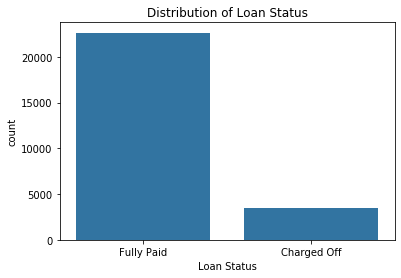

In [84]:
# let's plot the countplot for loan status category
base_color = sns.color_palette()[0]
sns.countplot(data = df, x = 'loan_status_cat', color = base_color);
plt.title("Distribution of Loan Status")
plt.xlabel('Loan Status')
plt.show();

In [40]:
# let's check the distribution of interest rate charged to customers
df.int_rate.describe()

count   35367.00
mean       11.98
std         3.70
min         5.42
25%         8.94
50%        11.83
75%        14.46
max        24.40
Name: int_rate, dtype: float64

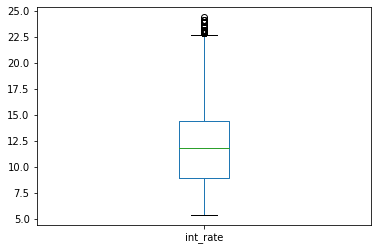

In [41]:
# let's also plot box plot for interest rate
df.int_rate.plot(kind='box');

Median interest rate changed is around 12.5%. High interest rates are charged to few clients max 24%. There're outliers at the higher end as well.

In [42]:
# let's check the distribution of Annual Income
df.annual_inc.describe()

count     35367.00
mean      69095.99
std       63967.05
min        4000.00
25%       41500.00
50%       60000.00
75%       82500.00
max     6000000.00
Name: annual_inc, dtype: float64

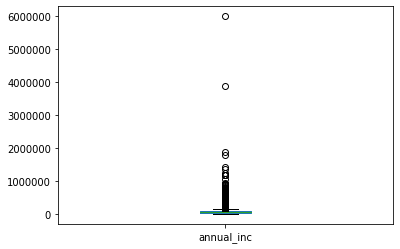

In [43]:
# let's also plot box plot for interest rate
df.annual_inc.plot(kind='box');

The median income is 60k and minimum is 4k. Looks like people with very low income were offered loans. ALso, there're high income earners as well. 

I'll now move on to the other variables in the dataset: grade, term_months, and purpose.

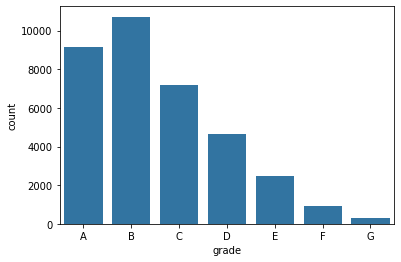

In [44]:
# grade
level_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
sns.countplot(data = df, x = 'grade', color = base_color, order=level_order);

Grade A and B are the most common to apply loans. This resonates with best to worst category of grade where low category have less number of loans.

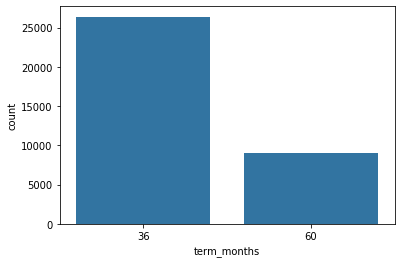

In [45]:
# term_month
sns.countplot(data = df, x = 'term_months', color = base_color);

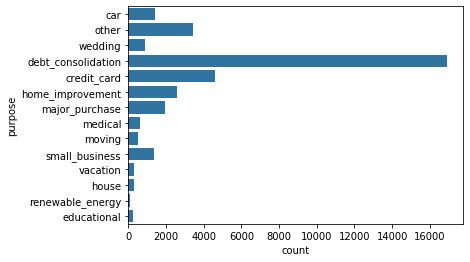

In [46]:
# Let's check the how purpose looks like
sns.countplot(y='purpose', data=df, color = base_color);

In [47]:
#proportion of unique purpose in dataset
df.purpose.value_counts() / df.shape[0]

debt_consolidation   0.48
credit_card          0.13
other                0.10
home_improvement     0.07
major_purchase       0.06
car                  0.04
small_business       0.04
wedding              0.02
medical              0.02
moving               0.01
vacation             0.01
house                0.01
educational          0.01
renewable_energy     0.00
Name: purpose, dtype: float64

`debt_consolidation` makes up almost 48% of all data under Purpose category and would be interesting to see how it relates to other variables. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?<br>
14% of total Loans are paid off. Loan status is a categorical variable which is transformed into numeric variable for computation.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?<br>
Found few outliers in Interest rate and annual income. No transformation is done on these variables.

# Bivariate Exploration

### Interest Rate Vs Loan Status
High interest rates defaults more

In [48]:
# let's check interest rate descriptive stats
df['int_rate'].describe()

count   35367.00
mean       11.98
std         3.70
min         5.42
25%         8.94
50%        11.83
75%        14.46
max        24.40
Name: int_rate, dtype: float64

In [49]:
# binning int_rate
df['int_rate_bin'] = pd.cut(df['int_rate'], 
                                [0,5,10,15,20,25,30], 
                                labels=['0-5','5-10','10-15','15-20','20-25','25-30'])
df['int_rate_bin'].value_counts()

10-15    16769
5-10     11101
15-20     6769
20-25      728
25-30        0
0-5          0
Name: int_rate_bin, dtype: int64

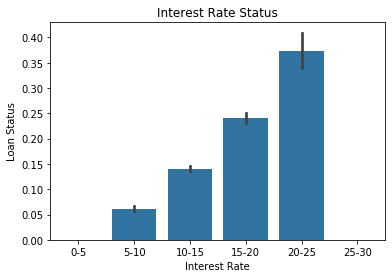

In [50]:
# Plot between interest rate and loan status
sns.barplot(x='int_rate_bin', y='loan_status', data=df, color = base_color)
plt.title('Interest Rate Status')
plt.xlabel('Interest Rate')
plt.ylabel('Loan Status')
plt.show()

### Annual Income Vs Loan Status
Clearly shows, low incomes has high default rates. Followed by Medium income earners.

In [51]:
# Continuous variable: annual_inc
df['annual_inc_raw'] = df['annual_inc']
df['annual_inc'].describe().astype('int')

count      35367
mean       69095
std        63967
min         4000
25%        41500
50%        60000
75%        82500
max      6000000
Name: annual_inc, dtype: int64

In [52]:
# binning annual income
def annual_inc(inc):
    if inc <= 50000:
        return 'low'
    elif inc > 50000 and inc <=100000:
        return 'medium'
    elif inc > 100000 and inc <=150000:
        return 'high'
    else:
        return 'very high'

df['annual_inc'] = df['annual_inc'].apply(lambda x: annual_inc(x))
df['annual_inc'].value_counts()

medium       16625
low          13721
high          3709
very high     1312
Name: annual_inc, dtype: int64

In [53]:
# cross tab between annual_inc and loan_status
pd.crosstab(df.annual_inc, df.loan_status_cat, margins=True, margins_name="Total")

loan_status_cat,Charged Off,Fully Paid,Total
annual_inc,,,
high,391,3318,3709
low,2229,11492,13721
medium,2184,14441,16625
very high,139,1173,1312
Total,4943,30424,35367


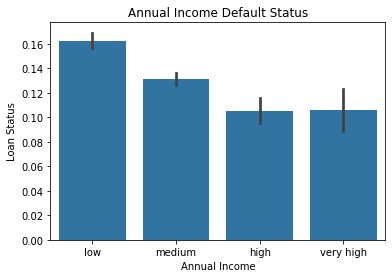

In [54]:
## bar plot on categorical variable : annual_inc
sns.barplot(x='annual_inc', y='loan_status', data=df, color = base_color)
plt.title('Annual Income Default Status')
plt.xlabel('Annual Income')
plt.ylabel('Loan Status')
plt.show()

### Grade Vs Loan Status 
 `Higher Grade Loans` have high percentage to default.

In [55]:
# crosstab between loan status and grade
pd.crosstab(df.grade, df.loan_status_cat, margins=True, margins_name="Total", normalize="index")

loan_status_cat,Charged Off,Fully Paid
grade,,
A,0.06,0.94
B,0.12,0.88
C,0.16,0.84
D,0.21,0.79
E,0.26,0.74
F,0.32,0.68
G,0.33,0.67
Total,0.14,0.86


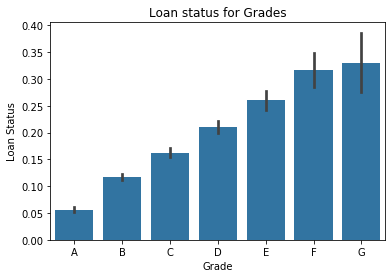

In [56]:
# bar plot on categorical variable : grade
sns.barplot(x='grade', y='loan_status', data=df, color = base_color, order = level_order)
plt.title('Loan status for Grades')
plt.xlabel('Grade')
plt.ylabel('Loan Status')
plt.show()

### Term Vs Loan Status 
Overall `60` months loan term tends to default more than twice as compared to `36` months.

In [57]:
# crosstab between month term and loan status. Showing percentage of defaults
pd.crosstab(df.term_months, df.loan_status_cat, margins=True, margins_name="Total", normalize="index")

loan_status_cat,Charged Off,Fully Paid
term_months,,
36,0.10,0.90
60,0.25,0.75
Total,0.14,0.86


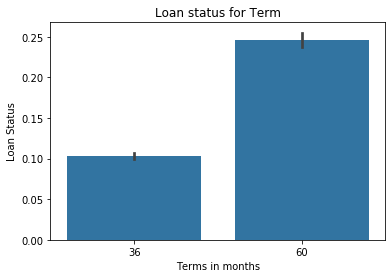

In [58]:
# bar plot on categorical variable : term_months
plt.title('Loan status for Term')
sns.barplot(x='term_months', y='loan_status', data=df, color = base_color)
plt.xlabel('Terms in months')
plt.ylabel('Loan Status')
plt.show()

### Loan Purpose Vs Status
Clients having `small_business` as purpose defaults the most followed by `renewable_energy` and `house`.

In [59]:
# crosstab between purpose and loan_status
pd.crosstab(df.purpose, df.loan_status_cat, margins=True, margins_name="Total", normalize="index")

loan_status_cat,Charged Off,Fully Paid
purpose,,
car,0.11,0.89
credit_card,0.10,0.90
debt_consolidation,0.15,0.85
educational,0.16,0.84
home_improvement,0.11,0.89
house,0.16,0.84
major_purchase,0.10,0.90
medical,0.15,0.85
moving,0.15,0.85


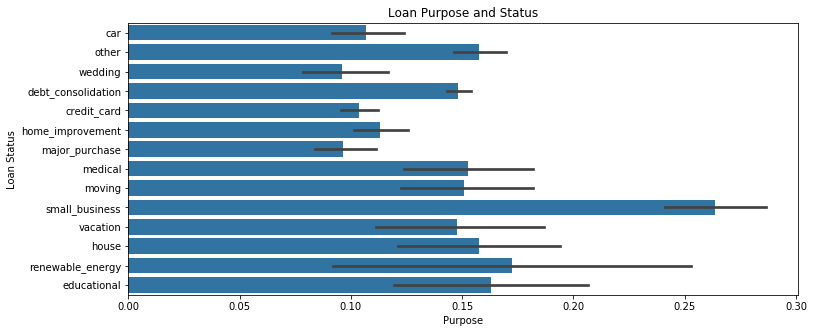

In [60]:
## bar plot on categorical variable : purpose
plt.figure(figsize = [12, 5])
sns.barplot(y='purpose', x='loan_status', data=df, color = base_color)
plt.title('Loan Purpose and Status')
plt.xlabel('Purpose')
plt.ylabel('Loan Status')
plt.show()

### Loan Year Vs Status

In [61]:
# crosstab between loan status and issue year
pd.crosstab(df.loan_status_cat, df.issue_d_year, margins=True, margins_name="Total")

issue_d_year,2007,2008,2009,2010,2011,Total
loan_status_cat,,,,,,
Charged Off,2,160,541,1309,2931,4943
Fully Paid,4,893,3882,9486,16159,30424
Total,6,1053,4423,10795,19090,35367


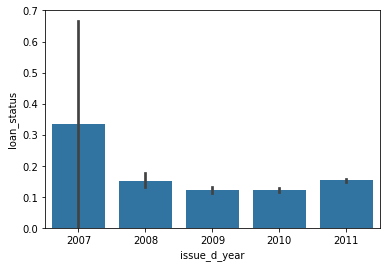

In [62]:
## bar plot on categorical variable : issue_d_year
sns.barplot(x='issue_d_year', y='loan_status', data=df,  color = base_color)
plt.show()

The default rate had suddenly increased in 2011, inspite of reducing from 2008 till 2010

### Home Owners Vs Loan Status 

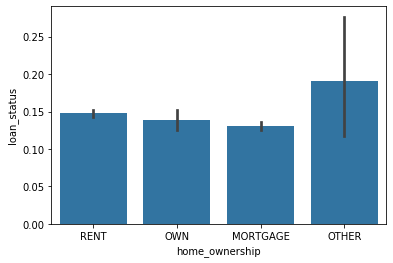

In [63]:
## bar plot on categorical variable : home_ownership
sns.barplot(x='home_ownership', y='loan_status', data=df, color = base_color)
plt.show()

Clients having `OTHER` as home ownership could be considered under High Risk Category.

### Employment Length Vs Loan Status 

In [64]:
# crosstab between emp_length and loan_status
pd.crosstab(df.loan_status_cat, df.emp_length, margins=True, margins_name="Total", normalize="index")

emp_length,0,1,2,3,4,5,6,7,8,9,10
loan_status_cat,,,,,,,,,,,
Charged Off,0.11,0.08,0.11,0.11,0.09,0.09,0.06,0.05,0.04,0.03,0.25
Fully Paid,0.11,0.08,0.12,0.11,0.09,0.09,0.06,0.05,0.04,0.03,0.22
Total,0.11,0.08,0.12,0.11,0.09,0.09,0.06,0.05,0.04,0.03,0.23


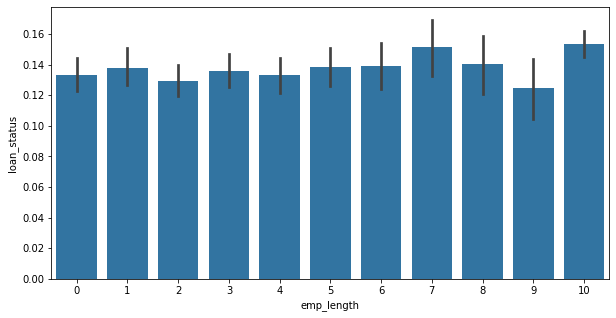

In [65]:
## bar plot on categorical variable : emp_length
plt.figure(figsize=(10,5))
sns.barplot(x='emp_length', y='loan_status', data=df, color = base_color)
plt.show()

`Employment length` is not much of a predictor of default

### Loan Amount Vs Loan Status
Very high and high amount loans tend to have more defaulters¶

In [66]:
df['loan_amnt'].describe().astype('int')

count    35367
mean     11133
std       7326
min        500
25%       5500
50%      10000
75%      15000
max      35000
Name: loan_amnt, dtype: int64

In [67]:
# binning loan_amnt
def loan_amnt(amt):
    if amt <= 5500:
        return 'low'
    elif amt > 5500 and amt <=10000:
        return 'medium'
    elif amt > 10000 and amt <=15000:
        return 'high'
    else:
        return 'very high'

df['loan_amnt_bin'] = df['loan_amnt'].apply(lambda x: loan_amnt(x))
df['loan_amnt_bin'].value_counts()

medium       11241
low           8939
very high     7987
high          7200
Name: loan_amnt_bin, dtype: int64

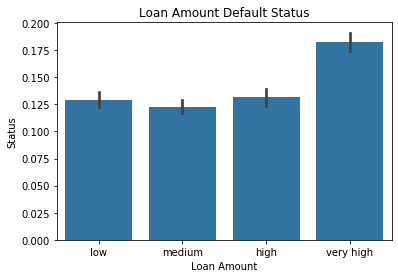

In [68]:
## bar plot on categorical variable : loan_amnt_bin
loan_order = ['low', 'medium', 'high', 'very high']
sns.barplot(x='loan_amnt_bin', y='loan_status', data=df, color = base_color, order = loan_order)
plt.title('Loan Amount Default Status')
plt.xlabel('Loan Amount')
plt.ylabel('Status')
plt.show()

### Debt To Income Ratio Vs Loan Status

In [69]:
df['dti'].describe()

count   35367.00
mean       13.40
std         6.64
min         0.00
25%         8.32
50%        13.50
75%        18.64
max        29.99
Name: dti, dtype: float64

In [70]:
# binning debt to income ratio
df['dti_bin'] = pd.cut(df['dti'], 
                                [0,5,10,15,20,25,30], 
                                labels=['0-5','5-10','10-15','15-20','20-25','25-30'])
df['dti_bin'].value_counts()

10-15    8901
15-20    8170
5-10     7125
20-25    6164
0-5      4292
25-30     575
Name: dti_bin, dtype: int64

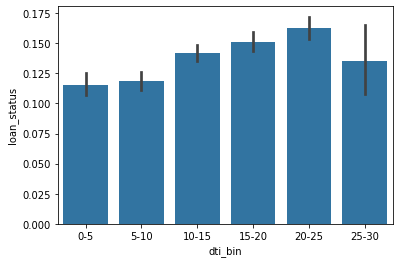

In [71]:
## bar plot on categorical variable : dti_bin
sns.barplot(x='dti_bin', y='loan_status', data=df, color = base_color)
plt.show()

Most of the defaulters have debt to income ratio between 20 to 25 %. But there's not much of difference between the lower and highest end of debts. There's an increase in trend from lower to higher end with an exception of decrease in default rate for highest level of debt-income-ratio.

### Installment Vs Loan Status

In [72]:
# installment
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
df['installment'] = df['installment'].apply(lambda x: installment(x))

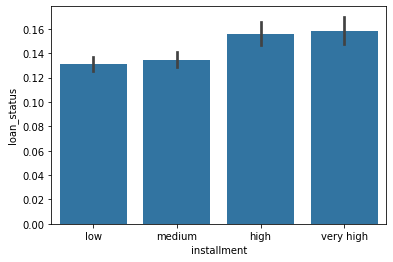

In [73]:
## bar plot
sns.barplot(x='installment', y='loan_status', data=df, color = base_color)
plt.show();

Higher the installment amount, higher is the default rate. But the difference between low to very high defaults is not very significant it's approx 4% rate of default.

### Loan Purpose Vs Interest Rate

In [74]:
# loan purpose Vs Interest Rate
pd.crosstab(df.purpose, df.int_rate_bin, margins=True, margins_name="Total", normalize="index").apply(lambda r: round(100*(r/r.sum())), axis=1)

int_rate_bin,5-10,10-15,15-20,20-25
purpose,,,,
car,47.00,40.00,12.00,0.00
credit_card,34.00,49.00,16.00,2.00
debt_consolidation,27.00,49.00,22.00,3.00
educational,27.00,64.00,9.00,0.00
home_improvement,39.00,44.00,16.00,2.00
house,32.00,41.00,23.00,3.00
major_purchase,44.00,42.00,14.00,1.00
medical,35.00,46.00,17.00,1.00
moving,35.00,47.00,16.00,2.00


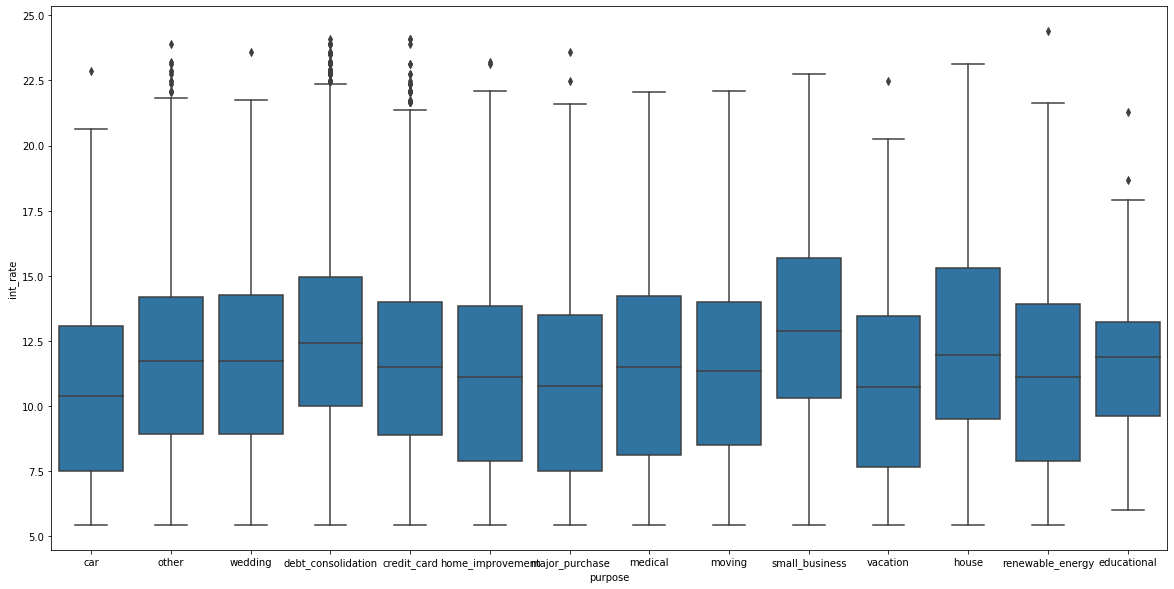

In [75]:
# Box plot between the loan purpose and interest rate offered
plt.figure(figsize=(20, 10))
sns.boxplot(x='purpose', y='int_rate', data=df, color = base_color);
plt.show();

`Small Business`, `House` and `Debt Consolidation` are considered as high risk loan purpose and hence offered more interest rates.

### Loan Amount Vs Interest Rate
Higher Interest rates are chanred for high loan amounts¶

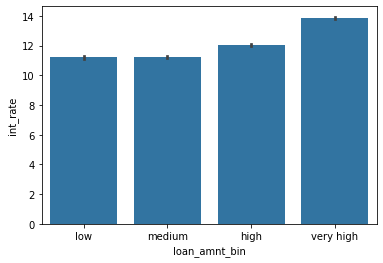

In [76]:
## bar plot on categorical variable : loan_amnt_bin
sns.barplot(x='loan_amnt_bin', y='int_rate', data=df, color = base_color)
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
Higher interest rates have high default rate. Low income earners tend to default more. There's an increasing trend observed for higher grades. Also, 60 month term has high defalut rate. Debt consolidation is the main purpose for loan defaults. Home ownership, debt-to-income ratio, employment length and installment amount are not significant predictors of loan status.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?¶
Interest charged to `small business, deb_consolidation` is more than others under purpose category. Also, high interest rates are chanrged for high loan amount.

### Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
Interest rate bins are created to distribute data in intervals of 5%. Annual income bins are created like low, medium, high and very high to visualize data in different income groups. Similarly, debt-to-income ratio bins are created fto distribute data in groups. Installment bins are also created to visualize data in different installment categories like low, medium etc.

# Multivariate Exploration
As seen during bivariate analysis `loan purpose`, `loan term`, `grade`, `interest rate`, `annual income` and `loan amount` are significant variables to determine rate of defaults. Hence, we try to mix few of these variables to see the relationship with rate of default.

In [77]:
# let's check the top 5 purpose of loans
df.purpose.value_counts()

debt_consolidation    16911
credit_card            4626
other                  3462
home_improvement       2614
major_purchase         1973
car                    1395
small_business         1351
wedding                 865
medical                 622
moving                  523
vacation                332
house                   330
educational             276
renewable_energy         87
Name: purpose, dtype: int64

In [78]:
# let's take top 4 purpose excluding Other since it's detail is not very clear
main_purposes = ["debt_consolidation", "credit_card","home_improvement","major_purchase"]
df = df[df['purpose'].isin(main_purposes)]
df['purpose'].value_counts()

debt_consolidation    16911
credit_card            4626
home_improvement       2614
major_purchase         1973
Name: purpose, dtype: int64

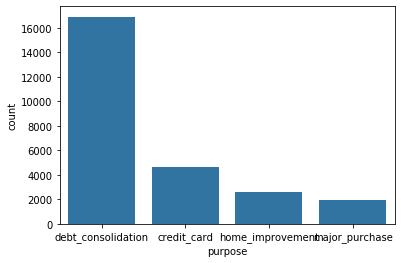

In [79]:
sns.countplot(data = df, x = 'purpose', color = base_color);

## Loan Term, Purpose Vs Loan Status
Plotting loan purpose against loan term shows that `debt consolidation` has the highest rate of default in both loan terms 36 and 60 months.There's an increase in trend of loan defaulters when we move from lower term to higher term. Among all purposes, `debt consolidation` tends to default most. There's much higher default rate 25%+ for 60 months term against only 12% for 36 months period. Also, 60 months term has much higher default rate almost double than 36 months which can also be considered to be very risky.

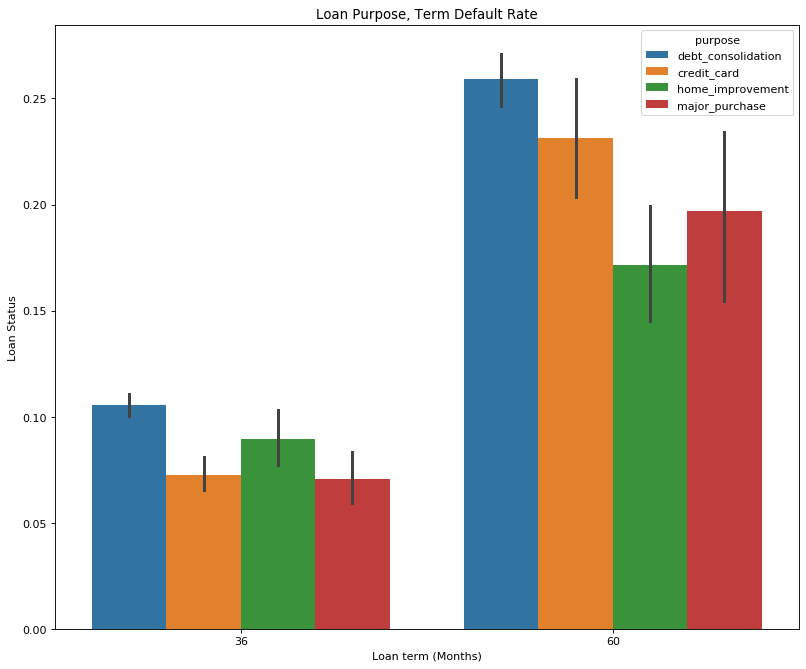

In [80]:
# let's now compare the default rates across two types of categorical variables
# purpose of loan (constant) and another categorical variable (which changes)
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='term_months', y='loan_status', hue="purpose", data=df)
plt.title('Loan Purpose, Term Default Rate')
plt.xlabel('Loan term (Months)')
plt.ylabel('Loan Status')
plt.show();

## Loan Amount, Interest Rate Vs Loan Status
Let's check how default rate varies with Loan amount and interest rates which are significant variables found during bivariate analysis. As can be seen, high loan amount are charged high interest rates. As the interest rate goes higher, default rates goes up as well. For high loan amount and interest rate between 20-25 % have more than 40% default rates.

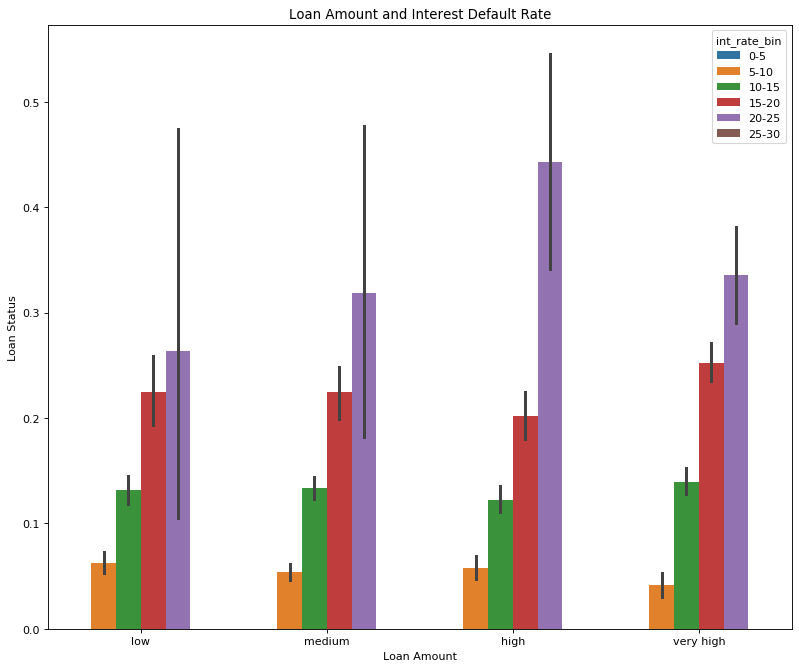

In [81]:
# Loan Amount
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='loan_amnt_bin', y='loan_status', hue="int_rate_bin", data=df, order = loan_order)
plt.title('Loan Amount and Interest Default Rate')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Status')
plt.show();

## Installment, Annual Income Vs Loan Status
Let's plot Installment and Annual income against loan status. We've already seen low income group and high installment have high default rates, similar trend can also be seen below where low income group having high installment are highest defaulters. Higest default rate for low income is around 18% and the lowest default rate for high income is 12.5%.

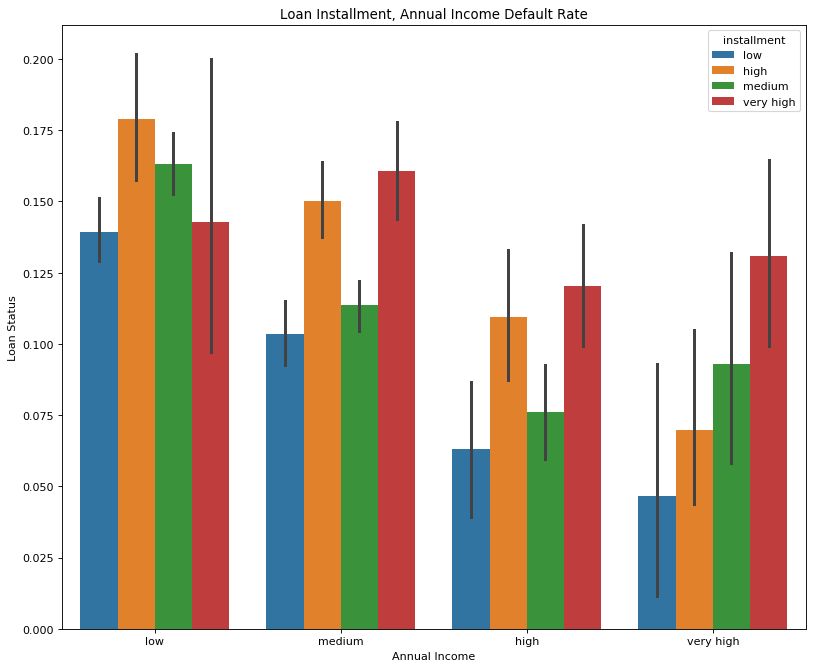

In [82]:
# Installment
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='annual_inc', y='loan_status', hue="installment", data=df, order = loan_order)
plt.title('Loan Installment, Annual Income Default Rate')
plt.xlabel('Annual Income')
plt.ylabel('Loan Status')
plt.show();

## Grade, Purpose Vs Loan Status
Extending our finding of `debt_consolidation` as the most common reason for default. Let's plot purpose with Grade category. We've already seen higher grade tends to default. Let's see if this trend of higher grade and `deb_consolidation` as purpose also hold true. As seen below, there's an increase in trend for higher order Grades namely E, F and G having `deb_consolidation` as main purpose defaults the most.

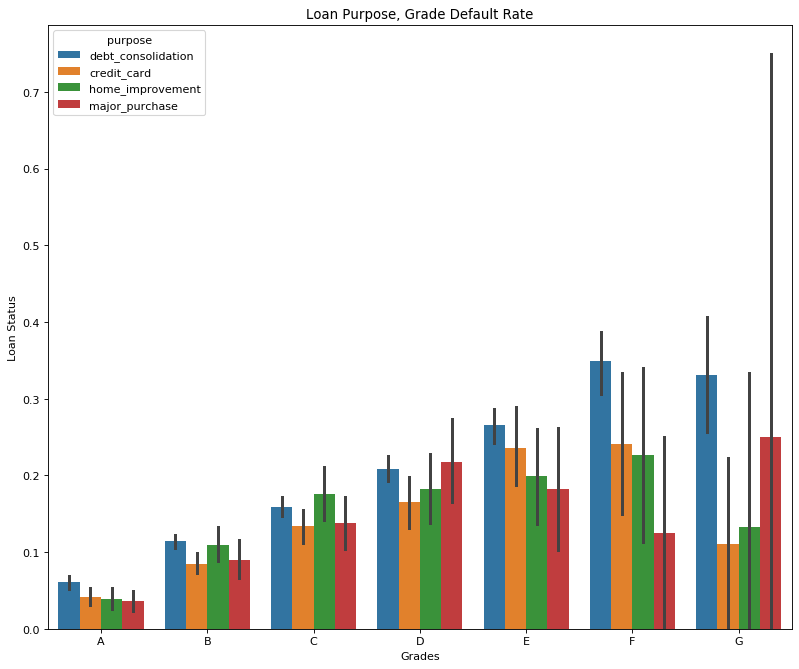

In [83]:
# grade
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='grade', y='loan_status', hue="purpose", data=df, order = level_order)
plt.title('Loan Purpose, Grade Default Rate')
plt.xlabel('Grades')
plt.ylabel('Loan Status')
plt.show();

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
`debt_consolidation` having 60 months loan term is the top category to default. This also, hold true for higher Grades as well. Higher loan amount attaracts higher interest rate with high risk of default. Low income group with high installment amount has high default rate.

### Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
Top 4 purpose are segregated into main purpose and plotted against Grade and loan term.